<a href="https://colab.research.google.com/github/kaustav927/Archi/blob/master/LoanPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries into our model

In [ ]:
!git init


Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add loaned https://github.com/kaustav927/LoanPredictionModel.git

In [ ]:
#Data Handling and Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

#Statistical Analysis
from scipy import stats

#Plotting and Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120


!pip install googlemaps
!pip install ortools
!pip install gmaps
!jupyter nbextension enable --py --sys-prefix widgetsnbextension


#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

Loading Data

In [ ]:
customerLoans = pd.read_csv('/content/CustomerLoans.csv',sep=',')
customerLoans.head()

In [ ]:
customerDemographics = pd.read_csv('/content/Demographics.csv',sep=',')
customerDemographics.head()

Examine Missing Data

In [ ]:
customerLoans.isna().sum()
customerDemographics.isna().sum()

custid                   0
Name                     0
Job                      0
Age                      0
Lat                      0
Long                     0
Income                   0
CreditScore              0
HouseholdSize            0
ZipCode                  0
MajorCity                0
State                    0
MedianHomeValue          0
MedianHouseholdIncome    0
Debt                     0
dtype: int64

Examine Outliers

In [ ]:
num_cols_loans = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount']
customerLoans[(np.abs(stats.zscore(customerLoans[num_cols_loans])) > 3).all(axis=1)]

In [ ]:
num_cols_customer = ['Age','Income','CreditScore','HouseholdSize','MedianHomeValue','Debt']
customerDemographics[(np.abs(stats.zscore(customerDemographics[num_cols_customer])) > 3).all(axis=1)]

Descriptive Statistics

In [ ]:
customerLoans[num_cols_loans].describe()
customerDemographics[num_cols_customer].describe()

,Age,Income,CreditScore,HouseholdSize,MedianHomeValue,Debt
count,48427.000000,48427.000000,48427.000000,48427.000000,4.842700e+04,48427.000000
mean,58.968509,182892.674665,700.479505,2.935408,2.324090e+05,36802.268387
std,23.886030,256729.653035,64.881945,1.876389,1.566480e+05,60675.888778
min,18.000000,10000.000000,620.000000,1.000000,4.860000e+04,0.000000
25%,38.000000,29018.500000,645.000000,2.000000,1.273000e+05,12851.560000
50%,59.000000,48407.000000,667.000000,3.000000,1.901000e+05,22052.250000
75%,80.000000,231794.000000,780.000000,4.000000,2.831000e+05,34402.530000
max,100.000000,949942.000000,799.000000,10.000000,1.000001e+06,924099.820000


Data Histograms - Customer Loans

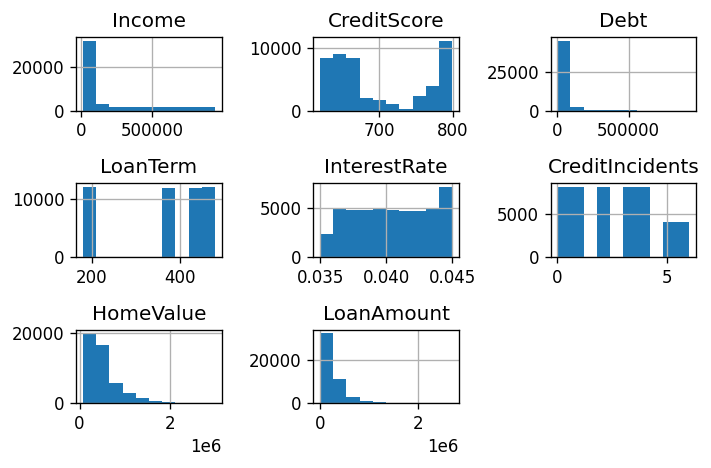

In [ ]:
customerLoans[num_cols_loans].hist()
plt.tight_layout()

Data Histograms - Customer Demographics

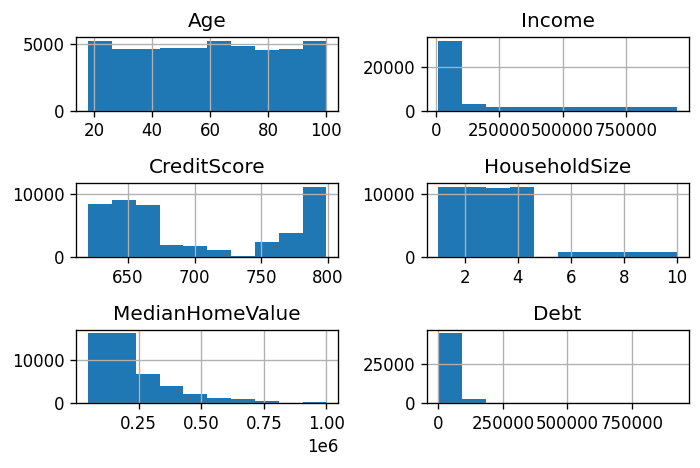

In [ ]:
customerDemographics[num_cols_customer].hist()
plt.tight_layout()

Joining Datasets Together